In [1]:
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt
import dlib
from PIL import Image
import numpy as np
import imutils
import cv2
import csv
import os
from datetime import datetime

In [ ]:
# Face landmarks file downloaded from Google Drive
# shape_predictor_68_face_landmarks.dat

In [4]:
!unzip /content/mask.zip

Archive:  /content/mask.zip
  inflating: blue_mask.png           
  inflating: landmark_mask.csv       


In [ ]:
#!unzip /content/cvdataset.zip

In [ ]:
#img = cv2.imread()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#img2 = cv2.imread()
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#img3 = cv2.imread()
#img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

#img4 = cv2.imread()
#img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

#fig = plt.figure()
#plt.subplot(121), plt.imshow(img), plt.title('Input Image Example')
#plt.subplot(122), plt.imshow(img2), plt.title('Input Image Example')
#plt.show()

#fig = plt.figure()
#plt.subplot(121), plt.imshow(img3), plt.title('Input Image Example')
#plt.subplot(122), plt.imshow(img4), plt.title('Input Image Example')
#plt.show()

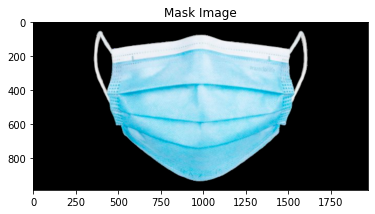

In [ ]:
imgMask = cv2.imread('/content/blue_mask.png')
imgMask = cv2.cvtColor(imgMask, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.imshow(imgMask), plt.title('Mask Image')
plt.show()

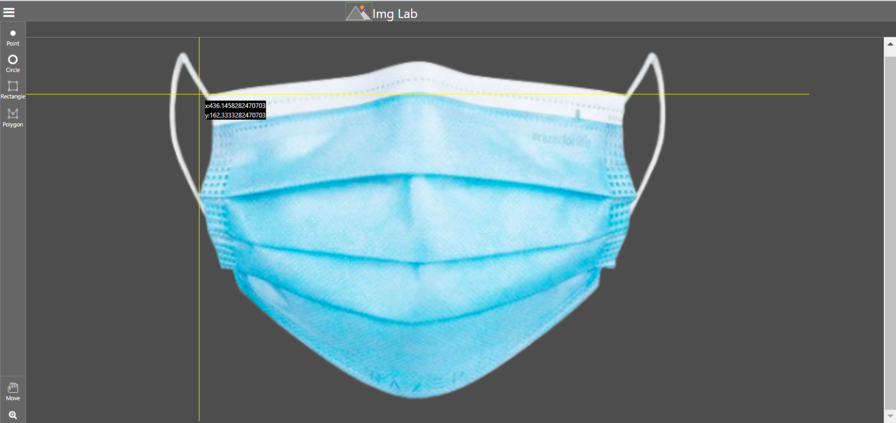

In [ ]:
# Create variable for face shape predictor
shape_predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

In [ ]:
def faceDetection(inputImage):
    ''' The function detects the faces in given images '''
    detectFaces = dlib.get_frontal_face_detector()
    foundFaces = detectFaces(inputImage)
    
    for eachFace in foundFaces:
      boundingBoxFace = [(eachFace.left(), eachFace.top(), eachFace.right(), eachFace.bottom())]

    return boundingBoxFace

In [ ]:
def croppedFace(pathtoImage, directoryImg):
    ''' The function detects the face and crops it according to face coordinates '''
    faceImage = cv2.imread(pathtoImage)
    faceImage = cv2.cvtColor(faceImage,cv2.COLOR_BGR2RGB)
    detectFace = faceDetection(faceImage)

    for face_x_y_coordinates in detectFace:
      # Crop the face according to face's x and y coordinates
        faceFinal = Image.fromarray(faceImage).crop(((face_x_y_coordinates[0]-10), (face_x_y_coordinates[1]-10), (face_x_y_coordinates[2]+10), (face_x_y_coordinates[3]+10)))        
    
    # Save the cropped image to same direction
    os.chdir(directoryImg)
    resizeImg = faceFinal.resize((350, 350))
    if pathtoImage == '/content/photo.jpg':
      resizeImg.save('final.jpg')
    else:
      resizeImg.save(pathtoImage)
    
    return (pathtoImage)

In [ ]:
def getfaceMask(mask):
    ''' The function reads the mask image '''
    maskImage = cv2.imread(mask, -1)
    finalMask = maskImage.astype(np.float32) / 255.0

    return finalMask

def getFaceMaskLandmark(mask):
    ''' The function reads the mask landmarks '''
    with open(mask) as csvFile:
      points = []
      csvFileFinal = csv.reader(csvFile, delimiter = ";")

      for line in csvFileFinal:
          try:
              points.append(np.array([int(line[1]), int(line[2])]))
          except:
              continue

    points = np.array(points)
    return points

In [ ]:
detectFaces2 = dlib.get_frontal_face_detector()

def getFaceLandmarks(faceImg):
    ''' The function reads the face landmarks '''
    image = cv2.imread(faceImg)
    faces = detectFaces2(image)

    pts = []
    global landmarksFace
    
    for face in faces:
        landmarksFace = shape_predictor(image, face)
    
    #Covering the area of the face between landmarks 2 and 16 and 30
    for a in range(1, 16):
        point = [landmarksFace.part(a).x, landmarksFace.part(a).y]
        pts.append(point)

    pts.append([landmarksFace.part(29).x, landmarksFace.part(29).y])

    finaltPts = np.array(pts)

    return image,finaltPts

In [ ]:
def MaskedFaceImage(image,source,destinaton,maskCSV):
    ''' The function overlays mask to the face '''
    copyImg = image.copy()
    copyImg = copyImg.astype(np.float32)
    copyImg = copyImg / 255.0

    X, _ = cv2.findHomography(source, destinaton)
    transformMask = cv2.warpPerspective(maskCSV, X, (copyImg.shape[1], copyImg.shape[0]), None)

    for w in range(0, 3):
        copyImg[:, :, w] = ( (transformMask[:, :, 3]) * transformMask[:, :, w] + (1.0 - transformMask[:, :, 3]) * copyImg[:, :, w] )

    result = cv2.cvtColor(copyImg, cv2.COLOR_BGR2RGB)
    
    return result

In [ ]:
os.chdir('/content')

blueMask = getFaceMaskLandmark('/content/landmark_mask.csv')
blueMaskLandmark = getfaceMask('/content/blue_mask.png')

for filename in os.listdir('/content/cvdataset'):
  for x in os.listdir(os.path.join('/content/cvdataset', filename)):
    a = (os.path.join('/content/cvdataset', filename))
    b = (os.path.join(a, x))

    try:
      b = croppedFace(b, a)
      faceImg, faceLandmark = getFaceLandmarks(b)

      os.chdir(a)
      finalImg = MaskedFaceImage(faceImg,blueMask,faceLandmark,blueMaskLandmark)
      resultImg = cv2.cvtColor(finalImg, cv2.COLOR_BGR2RGB)

      cv2.imwrite(b+'_mask.jpg',255*resultImg)
    except:
      pass

print('Preprocess is done')

Preprocess is done


In [ ]:
img = cv2.imread('/content/cvdataset/Andac Akpulat/cvdataset18.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/content/cvdataset/Andac Akpulat/cvdataset18.jpg_mask.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('/content/cvdataset/Ozge Bekar/cvdataset242.jpeg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img4 = cv2.imread('/content/cvdataset/Ozge Bekar/cvdataset242.jpeg_mask.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

img5 = cv2.imread('/content/cvdataset/Levent Baksi/cvdataset181.jpeg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img6 = cv2.imread('/content/cvdataset/Levent Baksi/cvdataset181.jpeg_mask.jpg')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.subplot(121), plt.imshow(img), plt.title('Output Image Example')
plt.subplot(122), plt.imshow(img2), plt.title('Output Image Example with Mask')
plt.show()

fig = plt.figure()
plt.subplot(121), plt.imshow(img3), plt.title('Output Image Example')
plt.subplot(122), plt.imshow(img4), plt.title('Output Image Example with Mask')
plt.show()

fig = plt.figure()
plt.subplot(121), plt.imshow(img5), plt.title('Output Image Example')
plt.subplot(122), plt.imshow(img6), plt.title('Output Image Example with Mask')
plt.show()

# Attendance

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  os.chdir('/content')
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
os.mkdir('/content/predict')
os.mkdir('/content/predict/predictUser')

In [ ]:
# attandenceFile created to keep records of users
os.chdir('/content')
attandenceFile = open("CV_attandance.txt","w+")

In [ ]:
inp = ''

while True:
  if inp == 'q':
    print('You quit the attandence system')
    break
  else:
    try:
      filename = take_photo()
      croppedFace('/content/photo.jpg', '/content/predict/predictUser')
      print('Face Predicted')
      attandenceFile.write("Name: " + "Time: " + str(datetime.now()) + '\n')
    except:
      print('Error')
  inp = input('Do you want to continue? If so, enter \'y\', otherwise, enter \'q\')\n')
  inp = inp.lower()

attandenceFile.close()

<IPython.core.display.Javascript object>

Face Predicted
Do you want to continue? If so, enter 'y', otherwise, enter 'q')
q
You quit the attandence system


In [ ]:
#!zip -r /content/cvdataset2 /content/cvdataset

In [ ]:
from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
path = r'C:\Users\nehak\Desktop\Computer Vision\Final dataset\cvdataset'

In [ ]:
X, P = [], []                                                  #blank variables got initialized

for root, directories, files in os.walk(path, topdown=False):  #using walk() method of os module scanning directories from bottom-up
    for name in files:
        P.append(os.path.join(root, name))                     #appending and adding each image to P variable to the end of the list
for i in range(len(P)):                                        #loop function defined to iterate through the length of the variable
    image_dir = P[i]
    img = Image.open(image_dir).convert('L').resize((350,350)) #Opening images from path, converted to grayscale and desired size
    img = np.array(img)                                        #Converting images into array
    img = img/255                                              #normalizing the images
        
    X.append(img)                                              #appending each image to X variable

In [ ]:
len(X)

In [ ]:
X = np.asarray(X)

In [ ]:
type(X)

In [ ]:
labels = pd.read_csv(r"C:\Users\nehak\Desktop\Computer Vision\Final dataset\dataset_Imagelabeling.csv")

In [ ]:
Y = np.array(list(labels['label']))

In [ ]:
Y

In [ ]:
len(Y)

## Compute PCA on face dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=75, whiten=True, random_state=80)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
X = X.reshape(X.shape[0], -1)

## Splitting the dataset into train and test subsets


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,            #Splitting the dataset into 80% training and 20% testing subsets
                                                random_state=80, test_size=0.2) 

In [ ]:
X.shape

## Training SVM classification model


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],                           #C paramenter will control the errors
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}       #gamma parameter define curvature 

grid = GridSearchCV(model, param_grid)                            #loops through hyperparameters and fit model on training set

%time grid.fit(Xtrain, ytrain)                                    #training model and calculating the time taken
print(grid.best_params_)                                          #look for best possible combinations of the grid

In [ ]:
model = grid.best_estimator_                                      #best estimator chosen by search with lowest error 
y_pred = model.predict(Xtest)                                     #predicting based on X test

In [ ]:
y_pred[:10]

In [ ]:
ytest[:10]

## Quantitative evaluation of the model quality on the test set


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score, confusion_matrix

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(ytest, y_pred, average='micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(ytest, y_pred, average='micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest, y_pred, average='micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(ytest, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
matrix = confusion_matrix(ytest, y_pred)
print('Confusion matrix:','\n',str(matrix))

print(sklearn.metrics.classification_report(ytest, y_pred, labels = Y))

## CNN Model

### Initialisation and imports

In [ ]:
import os
import numpy as np
import torch 
import torchvision
import torchvision.transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid, save_image
import torchvision.models
import matplotlib.pyplot
import torch.nn
from tqdm.notebook import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

### Data Loading and Proccesing for CNN Model

In [ ]:
from_opencv_images = '/content/computervisionproject/Train'

In [ ]:
mean_std_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [ ]:
def denorm(x, stats=mean_std_stats):
    return x * torch.Tensor(stats[1])[:,None,None] + torch.Tensor(stats[0])[:,None,None]

In [ ]:
opencv_img_s = 350
batch_s=16

In [ ]:
image_transforms = torchvision.transforms.Compose([torchvision.transforms.Resize(opencv_img_s), torchvision.transforms.GaussianBlur(kernel_size=11, sigma=(0.1, 2.0)), torchvision.transforms.ToTensor(), torchvision.transforms.Normalize(*mean_std_stats)])

In [ ]:
face_data = ImageFolder(from_opencv_images, transform=image_transforms)
person_names = face_data.classes

In [ ]:
print('There are', len(face_data), 'images')
print(face_data[0][0].size())
person_names

### Data Splitting for CNN Model

In [ ]:
face_data, valid_set = random_split(face_data, [len(face_data) - (int(len(face_data) * 15/100)), (int(len(face_data) * 15/100))])
face_data, test_set = random_split(face_data, [len(face_data) - (int(len(face_data) * 15/100)), (int(len(face_data) * 15/100))])

In [ ]:
train_loader = DataLoader(face_data, batch_size=batch_s, shuffle=True, num_workers=2) # set num_workers to your CPU core count
val_loader = DataLoader(valid_set, batch_size=batch_s, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_s, shuffle=False, num_workers=2)

### Model Selection and Preparing for Training

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True).to(device)
resnet18

In [ ]:
epochs = 5

In [ ]:
optimization = torch.optim.Adam(resnet18.parameters(), lr=1e-3)

In [ ]:
def model_training(epoch, epochs, resnet18, train_loader, loss_func, device, optimization, data_set=face_data):
    resnet18.train(True)
    torch.set_grad_enabled(True)
    model_epoch_loss, model_epochs_accuracy = 0.00, 0.00
    progress = tqdm(train_loader, total=len(train_loader))
    for img, names in progress:
        img = img.to(device)
        names = names.to(device)
        optimization.zero_grad()
        output = resnet18(img)
        _, prediction = torch.max(output, 1)   
        training_loss = loss_func(output, names)
        training_loss.backward()
        optimization.step()
        model_epoch_loss += training_loss.item()
        model_epochs_accuracy += torch.sum(prediction == names).item()      
        progress.set_description(f'epoch ---{epoch + 1}/{epochs}---')
        progress.set_postfix_str('training loss = {:.4f}'.format(training_loss.item()))
            
    model_epoch_loss = model_epoch_loss / len(train_loader)
    model_epochs_accuracy = model_epochs_accuracy / len(data_set)

    return model_epoch_loss, model_epochs_accuracy

In [ ]:
def model_evaluation(resnet18, train_loader, loss_func, device, data_set=valid_set):
    resnet18.train(False)
    model_epoch_loss, model_epochs_accuracy = 0.00, 0.00
    progress = tqdm(train_loader, total=len(train_loader), leave=False)
    for img, names in progress:
        img = img.to(device)
        names = names.to(device)
        output = resnet18(img)
        _, prediction = torch.max(output, 1)
        evaluation_loss = loss_func(output, names)
        model_epoch_loss += evaluation_loss.item()
        model_epochs_accuracy += torch.sum(prediction == names).item()
        progress.set_description(f'model evaluation')
        
    model_epoch_loss = model_epoch_loss / len(train_loader)
    model_epochs_accuracy = model_epochs_accuracy / len(data_set)

    return model_epoch_loss, model_epochs_accuracy

In [ ]:
def fit(epochs, resnet18, t_loader, v_loader, loss_func, device, optimization):
    
    history = []
    for epoch in range(epochs):
        torch.cuda.empty_cache()
        training_loss, training_accuracy = model_training(epoch, epochs, resnet18, t_loader, loss_func, device, optimization)
        torch.cuda.empty_cache()
        validation_loss, validation_accuracy = model_evaluation(resnet18, v_loader, loss_func, device)
        history.append({'training loss': training_loss, 'training accuracy': training_accuracy, 'validation loss': validation_loss, 'validation accuracy': validation_accuracy})
        metric = "[training loss]={:.4f} - [training accuracy]={:.4f} - [validation loss]={:.4f} - [validation accuracy]={:.4f}".format(training_loss, training_accuracy, validation_loss, validation_accuracy,)
        print(metric)
    return history

### Model Training

In [ ]:
%%time
fit_results = fit(epochs, resnet18, train_loader, val_loader, torch.nn.CrossEntropyLoss(), device, optimization)

In [ ]:
def losses_graph(history):
    losses = [fit_results['training loss'] for fit_results in history]
    val_losses = [fit_results['validation loss'] for fit_results in history]
    graph,ax = matplotlib.pyplot.subplots(1,1,figsize = (10, 8))
    ax.grid('on')
    ax.plot(losses, label = 'Loss')
    ax.plot(val_losses, label = 'Validation Loss')
    ax.set_xlim(left=1, right=len(losses))
    ax.legend();
    graph.show()

In [ ]:
losses_graph(fit_results)

In [ ]:
def accuracy_graph(history):
    accuracy = [fit_results['training accuracy'] for fit_results in history]
    val_accuracy = [fit_results['validation accuracy'] for fit_results in history]
    graph,ax = matplotlib.pyplot.subplots(1,1,figsize = (10, 8))
    ax.grid('on')
    ax.plot(100 * np.array(accuracy), label = 'Accuracy')
    ax.plot(100 * np.array(val_accuracy), label = 'Validation Accuracy')
    ax.set_xlim(left=1, right=len(accuracy))
    ax.legend();
    graph.show()

In [ ]:
accuracy_graph(fit_results)

In [ ]:
y_test, y_pred = [], []
for all_img, all_names in tqdm(val_loader):
    all_img = all_img.to(device)
    all_outputs = resnet18(all_img)
    _, prediction = torch.max(all_outputs, dim = 1)
    y_test += all_names.tolist()
    y_pred += prediction.tolist()

In [ ]:
loss, acc = model_evaluation(resnet18, val_loader, torch.nn.CrossEntropyLoss(), device)
print(f'training loss: {loss} - training accuracy: {acc}')

In [ ]:
from termcolor import colored


for i, name in enumerate(person_names):
    name = name.split("_")[-1]
    person_names[i] = name

# person_names

In [ ]:
idx = 4
for all_img, all_names in test_loader:
    all_img = all_img.to(device)
    all_outputs = resnet18(all_img)
    _, prediction = torch.max(all_outputs, dim = 1)
    fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denorm(all_img.cpu())
    ax.imshow(make_grid(denorm_images[:idx], nrow=8).permute(1, 2, 0).clamp(0,1))
    for pre, n in zip(prediction[:idx], all_names[:idx]):
        if n == pre.cpu():
            print(colored(person_names[pre], 'green'))
        else:
            print(colored(person_names[pre], 'red'), colored(person_names[n], 'blue'))
    break

In [ ]:
predicttestestk = '/content/predict'
predictdataset = ImageFolder(predicttestestk, transform=transformer)
predictclass = predictdataset.person_names
predict_dl = DataLoader(predictdataset, batch_size=1, shuffle=True, pin_memory=False, num_workers=3)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
cm_df = pd.DataFrame(cm)
matplotlib.pyplot.figure(figsize=(50, 50))
matplotlib.pyplot.title('Confusion Matrix')
sns.heatmap(cm_df, annot=True, cmap='Blues', square=True);

In [ ]:
print(classification_report(y_test, y_pred)) 